In [25]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("79385154 Treasuries Details.CSV")



In [27]:
# Identify how many rows got dropped
print("Original size:", len(df))
print("After dropna:", len(df.dropna(subset=['Maturity', 'Price'])))

# Visual inspection: look at rows where parsing may have failed
print(df[df['Maturity'].isna() | df['Price'].isna()])


Original size: 203
After dropna: 203
Empty DataFrame
Columns: [Action, Description, Coupon, Maturity, Quote, Quantity, Price, Min, Max, YTM, YTW1, Accrued Interest, Estimated Total]
Index: []


In [29]:
# Store cleaned version without dropping yet
df_clean = df.copy()
df_clean['Maturity'] = pd.to_datetime(df_clean['Maturity'], format='%m/%d/%Y', errors='coerce')
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')

# Don't drop yet — you can filter visually or with conditions later


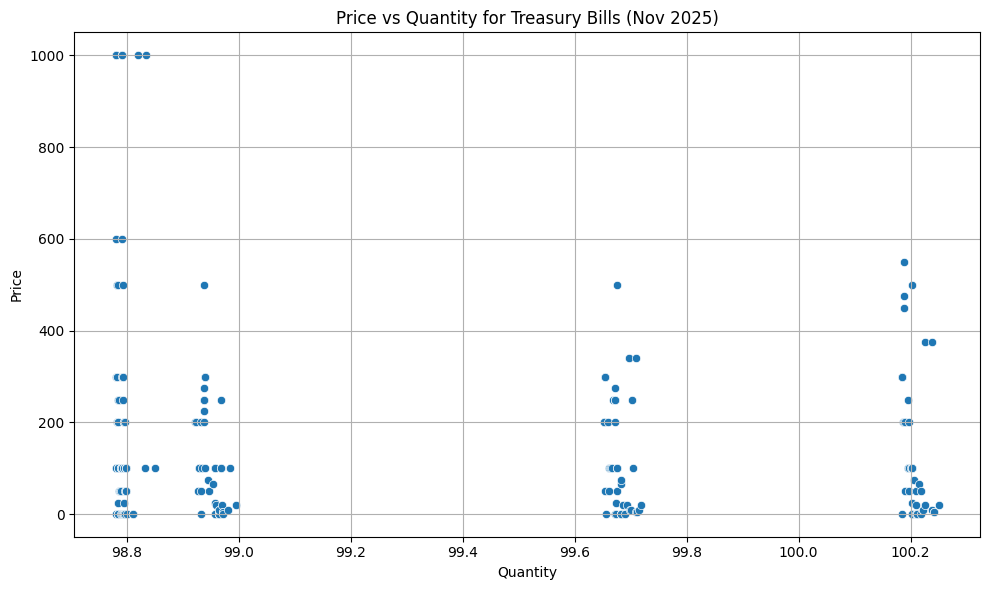

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Quantity', y='Price')
plt.title('Price vs Quantity for Treasury Bills (Nov 2025)')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
from datetime import datetime

purchase_price = 98.780
face_value = 100
maturity_date = datetime(2025, 11, 6)
purchase_date = datetime.today()

days_to_maturity = (maturity_date - purchase_date).days
annualized_yield = ((face_value / purchase_price) - 1) * (365 / days_to_maturity)
print(f"Estimated Yield: {annualized_yield:.4%}")


Estimated Yield: 4.2933%


In [51]:
import pandas as pd

# Define expected column names based on your sample
cols = ['Action', 'Description', 'Coupon', 'Maturity', 'Quote', 'Quantity', 'Price']

# Load the CSV with quote handling
df_raw = pd.read_csv("79385154 Treasuries Details.CSV", names=cols, skiprows=1, quotechar='"', encoding='utf-8', engine='python')

# Preview result
print(df_raw.head())


                                                                             Action  \
Buy US Treasury BILL 11/06/2025, 912797QP5 0.0 11/06/2025 Ask 25   98.78011       1   
                                                              1000 98.78083    1000   
                                                                   98.78083    1000   
                                                              600  98.78100     600   
                                                              100  98.78100     100   

                                                                             Description  \
Buy US Treasury BILL 11/06/2025, 912797QP5 0.0 11/06/2025 Ask 25   98.78011        15001   
                                                              1000 98.78083        15000   
                                                                   98.78083        15000   
                                                              600  98.78100         4000   
                 

In [53]:
df = pd.read_csv(
    "79385154 Treasuries Details.CSV",
    quotechar='"',
    delimiter=",",
    skiprows=1,
    header=None,
    engine="python"
)

# Preview structure
print(df.head(5))


    0                                       1    2           3    4     5   \
0  Buy  US Treasury BILL 11/06/2025, 912797QP5  0.0  11/06/2025  Ask    25   
1  Buy  US Treasury BILL 11/06/2025, 912797QP5  0.0  11/06/2025  Ask  1000   
2  Buy  US Treasury BILL 11/06/2025, 912797QP5  0.0  11/06/2025  Ask  1000   
3  Buy  US Treasury BILL 11/06/2025, 912797QP5  0.0  11/06/2025  Ask   600   
4  Buy  US Treasury BILL 11/06/2025, 912797QP5  0.0  11/06/2025  Ask   100   

         6     7      8      9   10  11           12  13  
0  98.78011     1  15001  4.293  --  --   24,695.030 NaN  
1  98.78083  1000  15000  4.290  --  --  987,808.330 NaN  
2  98.78083  1000  15000  4.290  --  --  987,808.340 NaN  
3  98.78100   600   4000  4.290  --  --  592,686.000 NaN  
4  98.78100   100  30000  4.290  --  --   98,781.000 NaN  


In [55]:
df.columns = ['Action', 'Description', 'Coupon', 'Maturity', 'Quote', 'Quantity', 'Price']


ValueError: Length mismatch: Expected axis has 14 elements, new values have 7 elements

In [43]:
print("Unique entries in Maturity:")
print(df['Maturity'].unique())

print("\nSample entries from Price:")
print(df['Price'].head(10))


Unique entries in Maturity:
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

Sample entries from Price:
Buy       1
Buy    1000
Buy    1000
Buy     600
Buy     100
Buy    1000
Buy     300
Buy     100
Buy     100
Buy     300
Name: Price, dtype: int64


In [37]:
import pandas as pd
from datetime import datetime

today = pd.Timestamp.today()

# Ensure Maturity column is properly parsed
df['Maturity'] = df['Maturity'].apply(pd.to_datetime, errors='coerce')

# Now compute DaysToMaturity and IRR
df['DaysToMaturity'] = (df['Maturity'] - today).dt.days
df['IRR'] = ((100 / df['Price']) - 1) * (365 / df['DaysToMaturity'])

# Sanity check
print(df[['Price', 'Maturity', 'DaysToMaturity', 'IRR']].head())


     Price Maturity  DaysToMaturity  IRR
Buy      1      NaT             NaN  NaN
Buy   1000      NaT             NaN  NaN
Buy   1000      NaT             NaN  NaN
Buy    600      NaT             NaN  NaN
Buy    100      NaT             NaN  NaN


In [39]:
# Simulate a 30-day hold and flip
df['Price_30d'] = df['Price'] * 1.0015  # assume 0.15% appreciation
df['Profit_Flip'] = df['Price_30d'] - df['Price']
df['Profit_Hold'] = 100 - df['Price']
df['Strategy_Choice'] = df.apply(
    lambda row: 'Hold' if row['Profit_Hold'] > row['Profit_Flip'] else 'Flip', axis=1
)


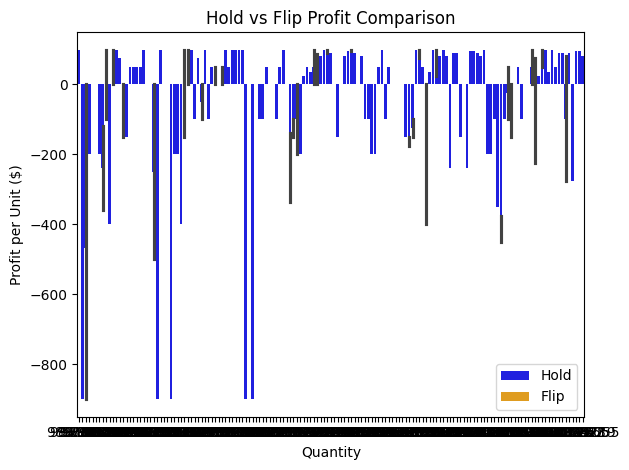

In [41]:
sns.barplot(data=df, x='Quantity', y='Profit_Hold', label='Hold', color='blue')
sns.barplot(data=df, x='Quantity', y='Profit_Flip', label='Flip', color='orange')
plt.legend()
plt.title('Hold vs Flip Profit Comparison')
plt.xlabel('Quantity')
plt.ylabel('Profit per Unit ($)')
plt.tight_layout()
plt.show()
